In [1]:
# !ping MONGODB

In [2]:
!ifconfig

eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 172.18.0.4  netmask 255.255.0.0  broadcast 172.18.255.255
        ether da:36:0c:ba:25:3d  txqueuelen 0  (Ethernet)
        RX packets 64599  bytes 41775982 (41.7 MB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 47282  bytes 20846866 (20.8 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        inet6 ::1  prefixlen 128  scopeid 0x10<host>
        loop  txqueuelen 1000  (Local Loopback)
        RX packets 1667  bytes 525635 (525.6 KB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 1667  bytes 525635 (525.6 KB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0



In [3]:
# !ping 172.18.0.4

In [4]:
# !pip install mysql-connector-python

In [5]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host = "mysql",  # MySQL 서버주소
        user = "root",
        password = "1234"
    )
    if conn.is_connected():
        print("MySQL 서버에 성공적으로 연결되었습니다.")
except mysql.connector.Error as err:
    print("MySQL 연결 실패 : ", err)
finally:
    if conn.is_connected():
        print("연결중...")

MySQL 서버에 성공적으로 연결되었습니다.
연결중...


In [6]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [7]:
# MySQL에 연결
conn = mysql.connector.connect(
        host = "mysql",
        user = "root",
        password = "1234",
        database = "judb"    # 사용할 데이터 베이스
    )
cursor = conn.cursor()
print("MySQL 연결 성공")

MySQL 연결 성공


In [8]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS users(id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(100), age INT, city VARCHAR(50))"
cursor.execute(query)
print("테이블 생성완료")

테이블 생성완료


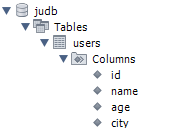

In [9]:
# 단일 데이터 삽입
sql = "INSERT INTO users (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit()
print("1개의 데이터 삽입 완료, ID : ", cursor.lastrowid)

1개의 데이터 삽입 완료, ID :  5


In [10]:
# 여러개의 데이터 삽입
m_values = [("Superman", 33, "Busan"), ("Cutegirl", 17, "Incheon"), ("Coolboy", 22, "Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러개의 데이터 삽입 완료")

여러개의 데이터 삽입 완료


In [20]:
# 모든 데이터 조회
que = "SELECT * FROM users"
cursor.execute(que)
users = cursor.fetchall()
# print(users)
for user in users:
    print(user)

(1, 'Alice', 25, 'Seoul')
(2, 'Superman', 33, 'Busan')
(3, 'Cutegirl', 17, 'Incheon')
(4, 'Coolboy', 22, 'Jeju')


In [23]:
# 특정 조건 데이터 조회(24살 이상만 조회)
que = "SELECT * FROM users"
filters = " WHERE age >= 24"
cursor.execute(que+filters)

filtered = cursor.fetchall()
for f in filtered:
    print(f)

(1, 'Alice', 25, 'Seoul')
(2, 'Superman', 33, 'Busan')


In [24]:
# 특정 사용자의 나이 수정
sql = "UPDATE users SET age = %s WHERE name = %s"
values = (19, "Alice")
cursor.execute(sql, values)
conn.commit()
print("수정된 행 개수 : ", cursor.rowcount)

수정된 행 개수 :  1


In [25]:
# 특정 사용자 삭제
que = "DELETE FROM users WHERE city = %s"
filters = ("jeju",)
cursor.execute(que, filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다.")

('jeju',)에 해당하는 목록을 삭제하였습니다.
